# Group assignment

## Energy data analysis

In this assignment, you will work with the `energy.csv` dataset, containing **hourly** data of energy consumption and generation in Spain. This dataset also contains the spot price of electricity.

### Rules for the assignment:

* Deadline: December 6th, 2022, 11pm.
* The group assignment's grade will be graded on the following criteria:
    * 50 %: presentation during Sessions 19 or 20
    * 50 %: answering questions during presentations
* Submission: 1 zip file containing:
    * 1 Jupyter notebook with your code: `group_assignment_group_X.ipynb`
    * 1 PDF file with your presentation
    * Not following these rules will result in a 0 grade for the assignment.
* No freeloaders during Group Assignments: if any of you see that any of your group members is not collaborating you tell me immediately. I will not accept excuses at the end of the course about the performance of any member.
* The presentation will be done by ONE (1) person chosen by the professor at random in the day of the presentations, so you all better work and collaborate to do a good job!
* All the students must be present during the presentations of the rest of the groups. 

### Type here the names of the members of your group

1. ...

### 0. Read the data

Read the data from the `energy.csv` file and store it in a DataFrame called `energy`.

In [1]:
import pandas as pd
import numpy as np

energy = pd.read_csv("energy.csv")

energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,0
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,1
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,1
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,1
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,1


### 1. Convert the `weekday` column from a number to a string (1 point)

Knowing that 0 represents Monday, 1 represents Tuesday, etc., convert the `weekday` column from a number to a string. 

Use `map` to perform this operation. You can mix it with a `lambda` function.

In [2]:
# We first create a duplicate data frame from energy under the name "energy_n"
energy_n = energy.copy()

# We then create a dictionary assigning the name of the day to a corresponding key that has a integer type
weekday_name = {
    0: "Monday", 
    1: "Tuesday",
    2: "Wednesday", 
    3: "Thursday", 
    4: "Friday", 
    5: "Saturday",
    6: "Sunday"
}

# We map the dictionary to get the weekday names.
energy_n["weekday"] = energy_n["weekday"].map(lambda x: weekday_name[x])

energy_n.head() # Reviewing the results

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,Monday
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,Tuesday
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,Tuesday
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,Tuesday
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,Tuesday


### 2. Same but for months (1 point)

In [3]:
month_name = {
    1: "January",
    2: "February", 
    3: "March", 
    4: "April", 
    5: "May",
    6: "June",
    7: "July", 
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}

energy_n["month"] = energy_n["month"].map(lambda x: month_name[x])
energy_n.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,December,31,23,Monday
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,January,1,0,Tuesday
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,January,1,1,Tuesday
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,January,1,2,Tuesday
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,January,1,3,Tuesday


### 3. What's the percentage of *unique* days in the total period in which we had at least one hour with a price below 10 euros? (1 point)

I'm not asking for the percentage of days of the month (represented in the column `day`), but the percentage of *unique* dates in the total period.

Maybe it's interesting to build a new column with the date, not the datetime. You can do this with the `pd.to_datetime` function. Or you can concat columns:

In the end you'll need a column representing the date, not the datetime, not the year, month, day, etc.

In [4]:
# Extracting unique dates for when the condition is met.
energy_unique = pd.to_datetime(energy[(energy.loc[:,"spot_price"]<10)].loc[:,'datetime']).dt.date.unique()
unique_days = len(energy_unique)
print('unique days with at least 1 hour with stock_price < 10 is:', unique_days)

# With the code lines below we find the total amount of unique days to find the required percentage
total_days = len(pd.to_datetime(energy['datetime']).dt.date.unique())
print('all days', total_days)

# We know calculate the percentage of days where the stock price was below 10.
stock_b_10_pct = unique_days/total_days
print(f'percentage of unique days with stock < 10 was: {stock_b_10_pct: .2%}') # This formats the number to a pct with 2 decimal points


unique days with at least 1 hour with stock_price < 10 is: 16
all days 365
percentage of unique days with stock < 10 was:  4.38%


### 4. How many hours per month, in average, do we have a price above the monthly average? And below? (1 point)

#### Higher

In [5]:
# First we create a duplicate dataframe(DF) from the original dataframe "energy"
energy_avg = energy.copy()
energy_avg['month_year'] = pd.to_datetime(energy_avg['datetime']).dt.to_period('M')    # Adding the month of the year information

# Groupby to compute the monthly price
energy_avg_only = energy_avg.groupby(["month_year"])[["spot_price"]].mean().reset_index()
energy_avg_only.rename(columns = {'spot_price':'spot_mean'}, inplace = True)    # Renaming columns for better readability

# Merging and comparing
energy_new = pd.merge(energy_avg, energy_avg_only, left_on='month_year', right_on='month_year')
energy_above_mean = energy_new[(energy_new["spot_price"]>energy_new["spot_mean"])] # Create new dataframe with only those above mean
# We now count the number of rows to see for how many hours we have spot price > spot mean
energy_hours_above_avg = energy_above_mean.groupby(["month_year"])[["spot_mean"]].count().reset_index()
# Now, for clarity, we are renaming the spot_mean column to count_hours_above_avg
energy_hours_above_avg.rename(columns = {'spot_mean':'count_hours_above_avg'}, inplace = True)

energy_hours_above_avg.head()


C:\Users\Vignesh Nambiar\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,month_year,count_hours_above_avg
0,2019-01,464
1,2019-02,384
2,2019-03,490
3,2019-04,469
4,2019-05,438


#### Lower

In [6]:
# The difference is that here we are trying to find for how many hours we have the spot price < spot mean
energy_below_mean = energy_new[(energy_new["spot_price"]<energy_new["spot_mean"])] # Create new dataframe with only those above mean
# We now count the number of rows to see for how many hours we have spot price > spot mean
energy_hours_below_avg = energy_below_mean.groupby(["month_year"])[["spot_mean"]].count().reset_index()
# Now, for clarity, we are renaming the spot_mean column to count_hours_above_avg
energy_hours_below_avg.rename(columns = {'spot_mean':'count_hours_below_avg'}, inplace = True)

energy_final = pd.merge(energy_hours_above_avg, energy_hours_below_avg, left_on='month_year', right_on='month_year')
energy_final

,month_year,count_hours_above_avg,count_hours_below_avg
0,2019-01,464,280
1,2019-02,384,288
2,2019-03,490,254
3,2019-04,469,251
4,2019-05,438,306
5,2019-06,367,353
6,2019-07,420,324
7,2019-08,401,343
8,2019-09,358,362
9,2019-10,393,351


### 5. Several questions (1 point)

Qualitative questions:

* Is `gas` generation higher or lower than its hourly average when `wind` generation is above its hourly average?
* Is the `spot_price` higher or lower than its hourly average when `solar` generation is above hourly its average?
* Is the `spot_price` higher or lower than its monthly average when `power_demand` is above its monthly average?


#### Question 1

In [7]:
# We first duplicate the dataframe energy and name it energy_wind
energy_wind = energy.copy()

# We find the hourly average of wind and gas production 
energy_wind_avg = energy_wind.groupby(["hour"])[["wind"]].mean()
energy_gas_avg = energy_wind.groupby(["hour"])[["gas"]].mean()

energy_wind_avg.rename(columns = {'wind':'wind_avg'}, inplace = True)
energy_gas_avg.rename(columns = {'gas':'gas_avg'}, inplace = True)

energy_new = pd.merge(energy_wind, energy_wind_avg, left_on='hour', right_on='hour')
energy_new = pd.merge(energy_new, energy_gas_avg, left_on='hour', right_on='hour')

# We keep only the data where the wind production is greater than the hourly average of wind production
energy_new = energy_new[(energy_new["wind"]>energy_new["wind_avg"])]

# Now, from the resulting dataframe, we are making a new column in which we specify if gas production is higher or lower than its hourly average 
energy_new.loc[:, 'H/L'] = np.where(energy_new.loc[:, 'gas'] > energy_new["gas_avg"], 'Higher', 'Lower')

# Afterwards, we are counting the cases in which hourly average of gas production was either higher or lower than the hourly mean
energy_final = energy_new.groupby(['H/L'])[["H/L"]].count()
print(energy_final)

# We now the compute the percentage of gas production by getting the value of the higher cases and dividing it by the total number of cases 
EFWC_value = (energy_final.iloc[0]['H/L'])
EFWC_total = energy_final.iloc[0]['H/L']+energy_final.iloc[1]['H/L']
print(f"percentage of Higher gas = {EFWC_value/EFWC_total: .2%}")




         H/L
H/L         
Higher   748
Lower   2864
percentage of Higher gas =  20.71%


#### Question 2

In [8]:
# We first duplicate the dataframe energy and name it energy_solar
energy_solar = energy.copy()

# We find the hourly average of solar and spot_price production 
energy_solar_avg = energy_solar.groupby(["hour"])[["solar"]].mean()
energy_sp_avg = energy_solar.groupby(["hour"])[["spot_price"]].mean()

energy_solar_avg.rename(columns = {'solar':'solar_avg'}, inplace = True)
energy_sp_avg.rename(columns = {'spot_price':'spot_price_avg'}, inplace = True)

energy_new = pd.merge(energy_solar, energy_solar_avg, left_on='hour', right_on='hour')
energy_new = pd.merge(energy_new, energy_sp_avg, left_on='hour', right_on='hour')

# Filter solar production to when it is higher than the average:
energy_new = energy_new[(energy_new["solar"]>energy_new["solar_avg"])]

# Adding a column based on whether the spot price is above or below the average: 
energy_new.loc[:, 'H/L'] = np.where(energy_new.loc[:, 'spot_price'] > energy_new["spot_price_avg"], 'Higher', 'Lower')

# Count the instance of when it is higher and lower:
energy_final = energy_new.groupby(['H/L'])[["H/L"]].count()
print(energy_final)

#Here we compute the percentage of cases in which solar spot price is higher than mean spot price
EFSC_value = (energy_final.iloc[0]['H/L'])
EFSC_total = energy_final.iloc[0]['H/L']+energy_final.iloc[1]['H/L']
print(f"percentage of cases where solar spot price is higher than mean spot price = {EFSC_value/EFSC_total : .2%}")

         H/L
H/L         
Higher  1497
Lower   1502
percentage of cases where solar spot price is higher than mean spot price =  49.92%


#### Question 3

In [9]:
# Creating a duplicate and computing the average for power demand and spot price:
energy_pd = energy.copy()


energy_pd_avg = energy_pd.groupby(["month"])[["power_demand"]].mean()
energy_sp_avg = energy_pd.groupby(["month"])[["spot_price"]].mean()

energy_pd_avg.rename(columns = {'power_demand':'pd_avg'}, inplace = True)
energy_sp_avg.rename(columns = {'spot_price':'spot_price_avg'}, inplace = True)

energy_new = pd.merge(energy_pd, energy_pd_avg, left_on='month', right_on='month')
energy_new = pd.merge(energy_new, energy_sp_avg, left_on='month', right_on='month')

# Here we filter the dateaframe where power demand is greater than the average power demand
energy_new = energy_new[(energy_new["power_demand"]>energy_new["pd_avg"])]

# Add condition for when it is higher and lower than the average:
energy_new.loc[:, 'H/L'] = np.where(energy_new.loc[:, 'spot_price'] > energy_new["spot_price_avg"], 'Higher', 'Lower')

#Then we count the cases in which spot price is higher than the mean spot price for power demand
energy_final = energy_new.groupby(['H/L'])[["H/L"]].count()
print(energy_final)


#Finally we compute the percentage of cases in which spot price is higher than the mean spot price of power demand 
EFPDC_value =(energy_final.iloc[0]['H/L'])
EFPDC_total =energy_final.iloc[0]['H/L']+energy_final.iloc[1]['H/L']
print(f"percentage of spot_price is higher than it's mean = {EFPDC_value/EFPDC_total: .2%}")



         H/L
H/L         
Higher  3521
Lower    988
percentage of spot_price is higher than it's mean =  78.09%


### 6. Understanding types of power generation (1 point)

The different types of power generation are:
* `nuclear`: nuclear power plants
* `hydro`: hydroelectric power plants
* `wind`: wind power plants
* `solar`: solar power plants
* `gas`: gas power plants
* `coal`: coal power plants

6.1. What's the average contribution of each type of power generation in percentage to the total generation, in the whole period?

6.2. What was the average contribution of each type power generation in percentage in the most expensive month?

6.3. What was the average contribution of each type power generation in percentage in the cheapest month?

In [10]:
#1
# We are creating new dataframes from the existent energy DF
energy_p = energy.copy()
energy_avg = energy.copy()

# Keeping all energy columns from the table
energy_p =energy_p.loc[:, 'nuclear':'wind']
energy_sums = energy_p.sum() # Computing the mean of each energy type 
sum_energy_mean =sum(energy_sums) # Adding means of all types
# We are then finding for each energy type their share of the total energy
energy_mean_per = energy_sums/sum_energy_mean
energy_mean_per = energy_mean_per.map('{:,.2%}'.format)

print(energy_mean_per)
print("\n")

#2 

# We are creating a new dataframe from the existent energy one 
energy_sum = energy.copy()
# We now create a new column in which input the extracted month from the datetime existent column 
energy_sum['month_year'] = pd.to_datetime(energy_sum['datetime']).dt.to_period('M')
# We group by using the new column created month_year and getting the sum of power demand for each corresponding month 
energy_sum_only = energy_sum.groupby(["month_year"])[["power_demand"]].sum()

# We are now finding the month which the highest power demand and we are storing that value in the variable max_energy_sum
max_energy_sum =((energy_sum.groupby(["month_year"])["power_demand"].sum())).idxmax()
# print(energy_sum_only,'\n')
print('max energy used in one month',max_energy_sum,'\n')

# From the selected month with the highest power demand, we are finding the usage of each energy type 
energy_p = energy_sum[(energy_sum["month_year"] == max_energy_sum)]
energy_p =energy_p.loc[:, 'nuclear':'wind']
energy_sum =energy_p.sum()
sum_energy_sums = sum(energy_sum)
energy_per = energy_sum/sum_energy_sums
energy_per = energy_per.map('{:,.2%}'.format)
print(energy_per)
print("\n")

#3 Same as first one but instead of idmax we use idmin

# We are creating a new dataframe from the existent energy one 
energy_sum = energy.copy()
# We now create a new column in which input the extracted month from the datetime existent column 
energy_sum['month_year'] = pd.to_datetime(energy_sum['datetime']).dt.to_period('M')
# We group by using the new column created month_year and getting the sum of power demand for each corresponding month 
energy_sum_only = (energy_sum.groupby(["month_year"])["power_demand"].sum())
# We are now finding the month which the lowest power demand and we are storing that value in the variable max_energy_sum
min_energy_sum =((energy_sum.groupby(["month_year"])["power_demand"].sum())).idxmin()
# print(energy_sum_only,'\n')
print('Minimum energy used in one month',min_energy_sum,'\n')

# From the selected month with the lowest power demand, we are finding the usage of each energy type
energy_p = energy_sum[(energy_sum["month_year"]==min_energy_sum)]
energy_p =energy_p.loc[:, 'nuclear':'wind']
#We compute the averge power demand of each energy source and divide it by the sum of power demand to calculate each energy sources´share of total energy means
energy_sums = energy_p.sum()
sum_energy_sums = sum(energy_sums)
energy_per = energy_sums/sum_energy_sums
energy_per = energy_per.map('{:,.2%}'.format)
print(energy_per)




nuclear    27.23%
gas        25.27%
solar       4.34%
hydro      11.96%
coal        5.30%
wind       25.91%
dtype: object


max energy used in one month 2019-01 

nuclear    25.31%
gas        16.28%
solar       2.31%
hydro      10.93%
coal       15.55%
wind       29.62%
dtype: object


Minimum energy used in one month 2018-12 

nuclear    33.81%
gas        16.48%
solar       0.04%
hydro      17.87%
coal       10.42%
wind       21.37%
dtype: object


C:\Users\Vignesh Nambiar\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\Vignesh Nambiar\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


### 8. Weekends vs weekdays (1 point)

Create a column called `weekend` that is `True` if the day is a weekend and `False` if it's a weekday. Use `np.where` to create this column.

How much expensive in average is a weekend day compared to a weekday?

In [11]:
# We are creating a new dataframe from the existent energy one 
energy_week = energy
# We are now creating a new column with each weekday as a string
energy_week['weekday'] = pd.to_datetime(energy_week['datetime']).dt.day_name()
# We are creating a new column named weekend in which we check if the day being analyzed is part of the weeked or not 
# If the day is weekend we are assigning the value "True", Else we are assigning the value "False"
energy_week['weekend'] = np.where((energy_week['weekday']=='Saturday')| (energy_week['weekday']=='Sunday'),'True','False')

# We are now filtering for those days that are considered as part of the weekend 
energy_weekend_filter = energy_week[(energy_week["weekend"]=='True')]
# We are now getting the mean power demand for that subset 
energy_weekend_filter_mean =energy_weekend_filter['spot_price'].mean()
print("mean for weekends = ",energy_weekend_filter_mean)

# We are now filtering for those days that are considered as part of the weekdays
energy_weekday_filter = energy_week[(energy_week["weekend"]=='False')]
# We are now getting the mean power demand for that subset 
energy_weekday_filter_mean =energy_weekday_filter['spot_price'].mean()
print("mean for weekdays = ",energy_weekday_filter_mean)

# We now have to find the difference in price between the weekend and weekdays 
cost_difference = energy_weekend_filter_mean - energy_weekday_filter_mean 
print("The cost difference is =", cost_difference)

# We find the difference as a % of the mean price of weekday 
percentage_cost_difference = (cost_difference / energy_weekday_filter_mean)* 100 
print("The percentage cost difference as compared to mean price of weekeday is =", round(percentage_cost_difference, 3),"%")

mean for weekends =  44.04191506410272
mean for weekdays =  49.17138920044893
The cost difference is = -5.129474136346211
The percentage cost difference as compared to mean price of weekeday is = -10.432 %


### 7. Open questions (2 points)

1. What´s the effect of hydroelectric power generation on the price of electricity?
2. What´s the effect of wind power generation on the price of electricity?
3. What´s the effect of solar power generation on the price of electricity?
4. What´s the effect of nuclear power generation on the price of electricity?
5. What´s the effect of gas power generation on the price of electricity?
6. What´s the effect of coal power generation on the price of electricity?

Spoiler: you can plot in `pandas` with `df.plot()`.

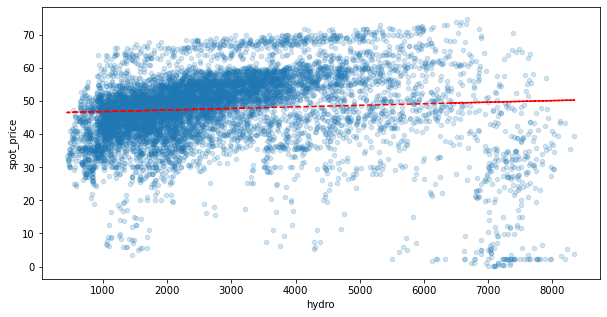

slope is =  0.04734649226076858


In [12]:
# plotting the average price for each hour of the day

#df = energy.groupby("hour")["spot_price"].mean().to_frame().reset_index()
#df.plot(x="hour", y="spot_price", figsize=(10, 5))

import matplotlib.pyplot as plt

energy.plot(x="hydro", y="spot_price", kind="scatter", figsize=(10, 5), alpha=0.2)
x = energy['hydro']
y = energy['spot_price']




z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

X = x - x.mean()
Y = y - y.mean()

slope = (X.dot(Y)) / (X.dot(X))*100
print("slope is = ",slope)

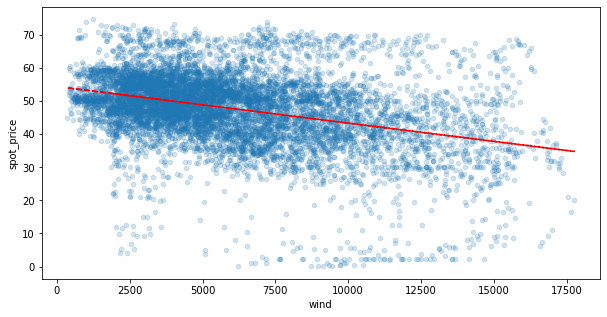

slope is =  -0.11039973631887327


In [13]:
# plotting a scatterplot of gas vs wind generation

energy.plot(x="wind", y="spot_price", kind="scatter", figsize=(10, 5), alpha=0.2)
x = energy['wind']
y = energy['spot_price']


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

X = x - x.mean()
Y = y - y.mean()

slope = (X.dot(Y)) / (X.dot(X))*100
print("slope is = ",slope)

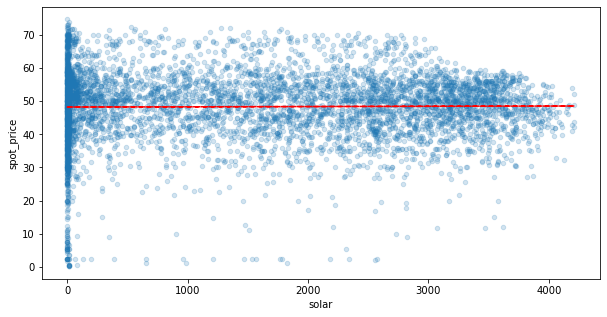

slope is =  0.007394602967425727


In [14]:
energy_filter_solar_null = energy[(energy["solar"]>1)]
energy_filter_solar_null.plot(x="solar", y="spot_price", kind="scatter", figsize=(10, 5), alpha=0.2)

x = energy_filter_solar_null['solar']
y = energy_filter_solar_null['spot_price']


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

X = x - x.mean()
Y = y - y.mean()

slope = (X.dot(Y)) / (X.dot(X))*100
print("slope is = ",slope)

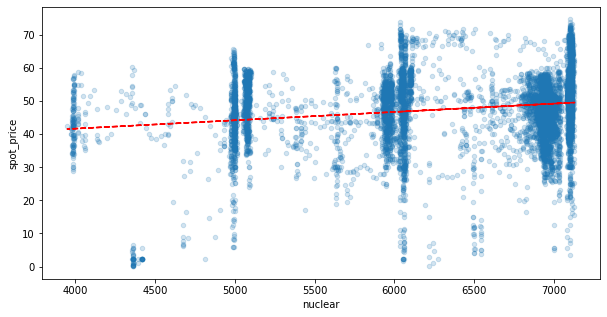

slope is =  0.25212678765476504


In [15]:
energy.plot(x="nuclear", y="spot_price", kind="scatter", figsize=(10, 5), alpha=0.2)
x = energy['nuclear']
y = energy['spot_price']


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

X = x - x.mean()
Y = y - y.mean()

slope = (X.dot(Y)) / (X.dot(X))*100
print("slope is = ",slope)

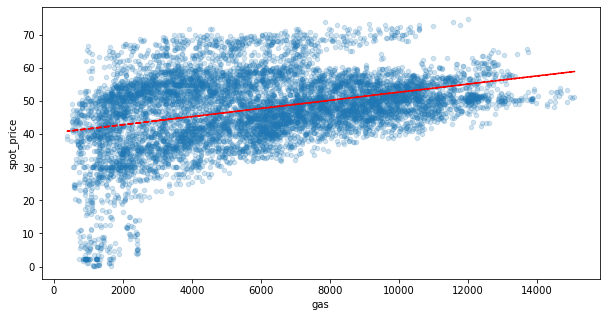

slope is =  0.12298848041110276


In [16]:
energy.plot(x="gas", y="spot_price", kind="scatter", figsize=(10, 5), alpha=0.2)
x = energy['gas']
y = energy['spot_price']


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

X = x - x.mean()
Y = y - y.mean()

slope = (X.dot(Y)) / (X.dot(X))*100
print("slope is = ",slope)

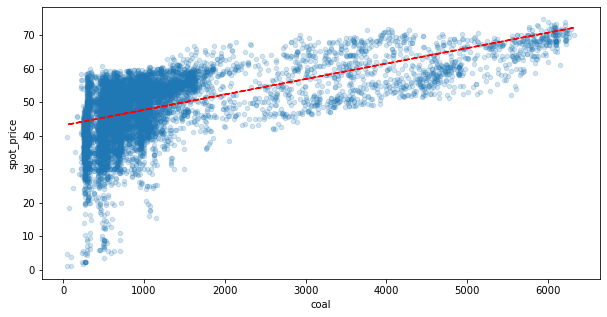

slope is =  0.46105371719684046


In [17]:
energy_f =energy
energy_f.plot(x="coal", y="spot_price", kind="scatter", figsize=(10, 5), alpha=0.2)

energy_f = energy_f.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()
x = energy_f['coal']
y = energy_f['spot_price']


z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

X = x - x.mean()
Y = y - y.mean()

slope = (X.dot(Y)) / (X.dot(X))*100
print("slope is = ",slope)